In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/main.csv")
data.head()

,url,UsingIp,longUrl,shortUrl,symbol,redirecting,prefixSuffix,SubDomains,https,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Label
0,https://usps.searchgo.top/go/TrackConfirmAction,1,1,1,1,1,1,0,1,1,...,1,1,-1,-1,-1,-1,-1,1,1,-1
1,https://supportteam3015623.io.vn/,1,1,1,1,1,1,0,1,-1,...,1,1,-1,-1,-1,-1,-1,-1,1,-1
2,https://bt-109056.weeblysite.com/,1,1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,-1,-1,1,1,-1
3,https://cloudflare-ipfs.com/ipfs/bafybeiafph6h...,1,-1,1,1,1,-1,1,1,1,...,1,1,-1,1,1,-1,-1,-1,1,-1
4,https://northlandpaddlers.org/blog/Meta/FGHJSG...,1,-1,1,1,1,1,1,1,1,...,1,1,-1,1,1,-1,-1,1,1,-1


In [3]:
data.shape

(8824, 31)

In [4]:
data = data.drop(['url', 'HTTPSDomainURL', 'StatsReport'],axis = 1)

In [5]:
label_1_data = data[data['Label'] == 1]
label_1_data.shape

(4120, 28)

In [6]:
label_1_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIp,4120.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
longUrl,4120.0,-0.035437,0.999493,-1.0,-1.0,-1.0,1.0,1.0
shortUrl,4120.0,0.840777,0.541448,-1.0,1.0,1.0,1.0,1.0
symbol,4120.0,0.995146,0.098425,-1.0,1.0,1.0,1.0,1.0
redirecting,4120.0,0.998544,0.053956,-1.0,1.0,1.0,1.0,1.0
prefixSuffix,4120.0,0.944175,0.329485,-1.0,1.0,1.0,1.0,1.0
SubDomains,4120.0,0.435194,0.592643,-1.0,0.0,0.0,1.0,1.0
https,4120.0,0.815534,0.578779,-1.0,1.0,1.0,1.0,1.0
DomainRegLen,4120.0,0.810194,0.586233,-1.0,1.0,1.0,1.0,1.0
Favicon,4120.0,0.472330,0.881529,-1.0,-1.0,1.0,1.0,1.0


In [7]:
label_0_data = data[data['Label'] == -1]
label_0_data.shape

(4704, 28)

In [8]:
label_0_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIp,4704.0,0.981293,0.192543,-1.0,1.0,1.0,1.0,1.0
longUrl,4704.0,0.147959,0.925347,-1.0,-1.0,1.0,1.0,1.0
shortUrl,4704.0,0.939201,0.343405,-1.0,1.0,1.0,1.0,1.0
symbol,4704.0,0.977041,0.213075,-1.0,1.0,1.0,1.0,1.0
redirecting,4704.0,0.971939,0.235259,-1.0,1.0,1.0,1.0,1.0
prefixSuffix,4704.0,0.108844,0.994165,-1.0,-1.0,1.0,1.0,1.0
SubDomains,4704.0,-0.042517,0.724044,-1.0,-1.0,0.0,0.0,1.0
https,4704.0,0.822279,0.569145,-1.0,1.0,1.0,1.0,1.0
DomainRegLen,4704.0,0.890731,0.454579,-1.0,1.0,1.0,1.0,1.0
Favicon,4704.0,-0.458333,0.888875,-1.0,-1.0,-1.0,1.0,1.0


In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
UsingIp,8824.0,0.990027,0.140884,-1.0,1.0,1.0,1.0,1.0
longUrl,8824.0,0.062330,0.964972,-1.0,-1.0,0.0,1.0,1.0
shortUrl,8824.0,0.893246,0.449594,-1.0,1.0,1.0,1.0,1.0
symbol,8824.0,0.985494,0.169719,-1.0,1.0,1.0,1.0,1.0
redirecting,8824.0,0.984361,0.176174,-1.0,1.0,1.0,1.0,1.0
prefixSuffix,8824.0,0.498867,0.866728,-1.0,-1.0,1.0,1.0,1.0
SubDomains,8824.0,0.180530,0.707260,-1.0,0.0,0.0,1.0,1.0
https,8824.0,0.819130,0.573641,-1.0,1.0,1.0,1.0,1.0
DomainRegLen,8824.0,0.853128,0.521731,-1.0,1.0,1.0,1.0,1.0
Favicon,8824.0,-0.023799,0.999773,-1.0,-1.0,-1.0,1.0,1.0


In [10]:
data = data.drop(['longUrl'],axis = 1)

In [11]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((7059, 26), (7059,), (1765, 26), (1765,))

In [13]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))


In [14]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)


LogisticRegression()

In [15]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)


In [16]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.827
Logistic Regression : Accuracy on test Data: 0.825

Logistic Regression : f1_score on training Data: 0.811
Logistic Regression : f1_score on test Data: 0.809

Logistic Regression : Recall on training Data: 0.798
Logistic Regression : Recall on test Data: 0.797

Logistic Regression : precision on training Data: 0.826
Logistic Regression : precision on test Data: 0.820


In [17]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84       946
           1       0.82      0.80      0.81       819

    accuracy                           0.82      1765
   macro avg       0.82      0.82      0.82      1765
weighted avg       0.82      0.82      0.82      1765



In [18]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [19]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:


#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)



In [21]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.873
K-Nearest Neighbors : Accuracy on test Data: 0.842

K-Nearest Neighbors : f1_score on training Data: 0.856
K-Nearest Neighbors : f1_score on test Data: 0.821

K-Nearest Neighborsn : Recall on training Data: 0.806
Logistic Regression : Recall on test Data: 0.783

K-Nearest Neighbors : precision on training Data: 0.914
K-Nearest Neighbors : precision on test Data: 0.864


In [22]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.83      0.89      0.86       946
           1       0.86      0.78      0.82       819

    accuracy                           0.84      1765
   macro avg       0.84      0.84      0.84      1765
weighted avg       0.84      0.84      0.84      1765



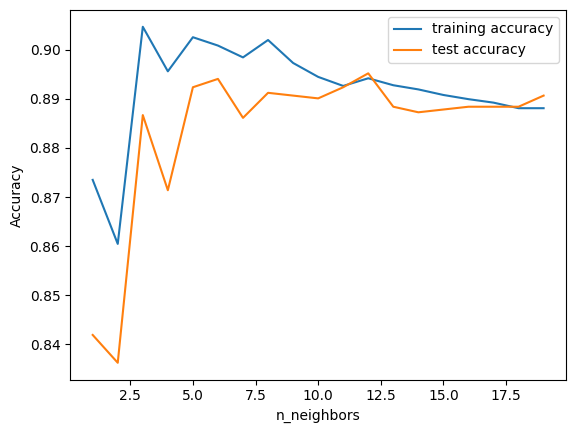

In [23]:


training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();



In [24]:
knn = KNeighborsClassifier(n_neighbors=4)

# fit the model 
knn.fit(X_train,y_train)
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

K-Nearest Neighbors : Accuracy on training Data: 0.896
K-Nearest Neighbors : Accuracy on test Data: 0.871

K-Nearest Neighbors : f1_score on training Data: 0.885
K-Nearest Neighbors : f1_score on test Data: 0.858

K-Nearest Neighborsn : Recall on training Data: 0.859
Logistic Regression : Recall on test Data: 0.840



In [25]:

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [26]:


# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [27]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [28]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.886
Support Vector Machine : Accuracy on test Data: 0.883

Support Vector Machine : f1_score on training Data: 0.876
Support Vector Machine : f1_score on test Data: 0.874

Support Vector Machine : Recall on training Data: 0.868
Support Vector Machine : Recall on test Data: 0.875

Support Vector Machine : precision on training Data: 0.885
Support Vector Machine : precision on test Data: 0.872


In [29]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.2],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.901
Support Vector Machine : Accuracy on test Data: 0.892

Support Vector Machine : f1_score on training Data: 0.892
Support Vector Machine : f1_score on test Data: 0.883

Support Vector Machine : Recall on training Data: 0.880
Support Vector Machine : Recall on test Data: 0.882

Support Vector Machine : precision on training Data: 0.905
Support Vector Machine : precision on test Data: 0.885


In [30]:

# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.4],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.915
Support Vector Machine : Accuracy on test Data: 0.897

Support Vector Machine : f1_score on training Data: 0.908
Support Vector Machine : f1_score on test Data: 0.890

Support Vector Machine : Recall on training Data: 0.897
Support Vector Machine : Recall on test Data: 0.890

Support Vector Machine : precision on training Data: 0.919
Support Vector Machine : precision on test Data: 0.889


In [31]:

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       946
           1       0.89      0.89      0.89       819

    accuracy                           0.90      1765
   macro avg       0.90      0.90      0.90      1765
weighted avg       0.90      0.90      0.90      1765



In [32]:
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [33]:


# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=30)

In [34]:

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)


In [35]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.928
Decision Tree : Accuracy on test Data: 0.895

Decision Tree : f1_score on training Data: 0.921
Decision Tree : f1_score on test Data: 0.888

Decision Tree : Recall on training Data: 0.906
Decision Tree : Recall on test Data: 0.891

Decision Tree : precision on training Data: 0.937
Decision Tree : precision on test Data: 0.884


In [36]:


#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))



              precision    recall  f1-score   support

          -1       0.91      0.90      0.90       946
           1       0.88      0.89      0.89       819

    accuracy                           0.90      1765
   macro avg       0.89      0.89      0.89      1765
weighted avg       0.90      0.90      0.90      1765



In [37]:


# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)



RandomForestClassifier(n_estimators=10)

In [38]:


#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))



Random Forest : Accuracy on training Data: 0.927
Random Forest : Accuracy on test Data: 0.894

Random Forest : f1_score on training Data: 0.921
Random Forest : f1_score on test Data: 0.887

Random Forest : Recall on training Data: 0.909
Random Forest : Recall on test Data: 0.895

Random Forest : precision on training Data: 0.933
Random Forest : precision on test Data: 0.884


In [39]:
print(metrics.classification_report(y_test, y_test_forest))


              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       946
           1       0.88      0.89      0.89       819

    accuracy                           0.89      1765
   macro avg       0.89      0.89      0.89      1765
weighted avg       0.89      0.89      0.89      1765



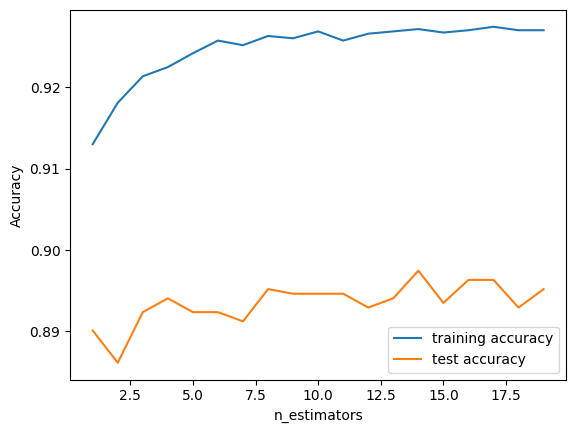

In [40]:


training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();



In [41]:


# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=11)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))
print(metrics.classification_report(y_test, y_test_forest))


Random Forest : Accuracy on training Data: 0.925
Random Forest : Accuracy on test Data: 0.891

Random Forest : f1_score on training Data: 0.919
Random Forest : f1_score on test Data: 0.883

Random Forest : Recall on training Data: 0.903
Random Forest : Recall on test Data: 0.888

Random Forest : precision on training Data: 0.935
Random Forest : precision on test Data: 0.884
              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       946
           1       0.88      0.89      0.88       819

    accuracy                           0.89      1765
   macro avg       0.89      0.89      0.89      1765
weighted avg       0.89      0.89      0.89      1765



In [42]:


#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)



In [43]:


# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [44]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))



Gradient Boosting Classifier : Accuracy on training Data: 0.919
Gradient Boosting Classifier : Accuracy on test Data: 0.895

Gradient Boosting Classifier : f1_score on training Data: 0.913
Gradient Boosting Classifier : f1_score on test Data: 0.888

Gradient Boosting Classifier : Recall on training Data: 0.905
Gradient Boosting Classifier : Recall on test Data: 0.891

Gradient Boosting Classifier : precision on training Data: 0.921
Gradient Boosting Classifier : precision on test Data: 0.884


In [45]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.91      0.90      0.90       946
           1       0.88      0.89      0.89       819

    accuracy                           0.90      1765
   macro avg       0.89      0.89      0.89      1765
weighted avg       0.90      0.90      0.90      1765



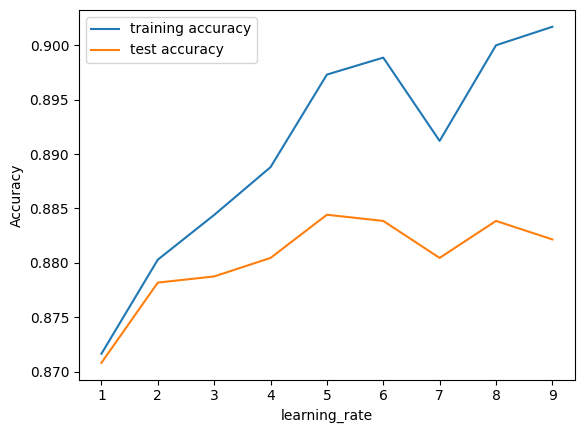

In [46]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [47]:


# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.9)

# fit the model 
gbc.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=0.9, max_depth=4)

In [48]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))



Gradient Boosting Classifier : Accuracy on training Data: 0.910
Gradient Boosting Classifier : Accuracy on test Data: 0.888

Gradient Boosting Classifier : f1_score on training Data: 0.902
Gradient Boosting Classifier : f1_score on test Data: 0.879

Gradient Boosting Classifier : Recall on training Data: 0.879
Gradient Boosting Classifier : Recall on test Data: 0.873

Gradient Boosting Classifier : precision on training Data: 0.925
Gradient Boosting Classifier : precision on test Data: 0.885


In [49]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.89      0.90      0.90       946
           1       0.88      0.87      0.88       819

    accuracy                           0.89      1765
   macro avg       0.89      0.89      0.89      1765
weighted avg       0.89      0.89      0.89      1765



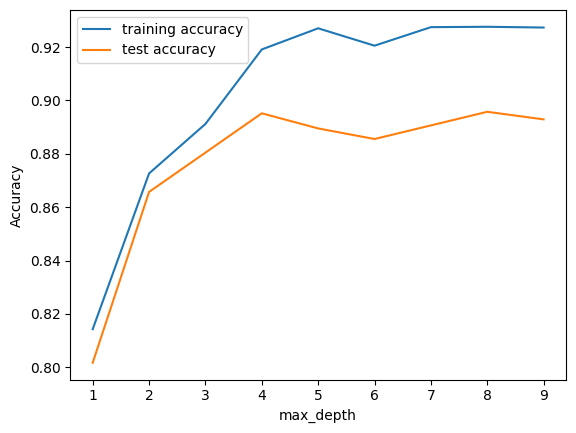

In [50]:


training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();



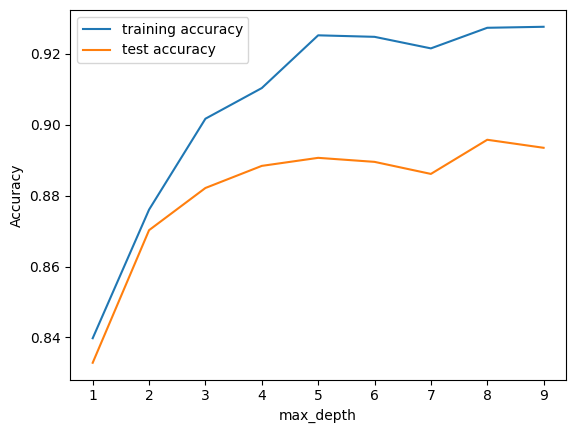

In [51]:


training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.9)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();



In [52]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [53]:


#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)



0:	learn: 0.6021434	total: 48.3ms	remaining: 48.2s
1:	learn: 0.5332640	total: 50.5ms	remaining: 25.2s
2:	learn: 0.4892853	total: 52.6ms	remaining: 17.5s
3:	learn: 0.4523326	total: 55.6ms	remaining: 13.8s
4:	learn: 0.4301025	total: 58ms	remaining: 11.5s
5:	learn: 0.4109487	total: 62.2ms	remaining: 10.3s
6:	learn: 0.3906079	total: 67.8ms	remaining: 9.61s
7:	learn: 0.3774327	total: 70.1ms	remaining: 8.69s
8:	learn: 0.3656447	total: 72.2ms	remaining: 7.95s
9:	learn: 0.3585953	total: 75.3ms	remaining: 7.46s
10:	learn: 0.3497268	total: 78.7ms	remaining: 7.08s
11:	learn: 0.3436643	total: 81.8ms	remaining: 6.73s
12:	learn: 0.3372670	total: 85ms	remaining: 6.46s
13:	learn: 0.3302539	total: 87.6ms	remaining: 6.17s
14:	learn: 0.3253255	total: 90.1ms	remaining: 5.92s
15:	learn: 0.3202632	total: 92.5ms	remaining: 5.69s
16:	learn: 0.3170559	total: 95.2ms	remaining: 5.51s
17:	learn: 0.3117999	total: 97.8ms	remaining: 5.34s
18:	learn: 0.3090633	total: 100ms	remaining: 5.17s
19:	learn: 0.3076223	total:

In [54]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))



CatBoost Classifier : Accuracy on training Data: 0.926
CatBoost Classifier : Accuracy on test Data: 0.895

CatBoost Classifier : f1_score on training Data: 0.920
CatBoost Classifier : f1_score on test Data: 0.888

CatBoost Classifier : Recall on training Data: 0.913
CatBoost Classifier : Recall on test Data: 0.897

CatBoost Classifier : precision on training Data: 0.927
CatBoost Classifier : precision on test Data: 0.879


In [55]:
print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       946
           1       0.88      0.90      0.89       819

    accuracy                           0.90      1765
   macro avg       0.89      0.90      0.89      1765
weighted avg       0.90      0.90      0.90      1765



In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.6021434	total: 2.42ms	remaining: 2.42s
1:	learn: 0.5332640	total: 5.24ms	remaining: 2.62s
2:	learn: 0.4892853	total: 7.33ms	remaining: 2.44s
3:	learn: 0.4523326	total: 10.2ms	remaining: 2.53s
4:	learn: 0.4301025	total: 13ms	remaining: 2.59s
5:	learn: 0.4109487	total: 16.5ms	remaining: 2.73s
6:	learn: 0.3906079	total: 19.9ms	remaining: 2.82s
7:	learn: 0.3774327	total: 23.1ms	remaining: 2.87s
8:	learn: 0.3656447	total: 25.7ms	remaining: 2.83s
9:	learn: 0.3585953	total: 28.6ms	remaining: 2.83s
10:	learn: 0.3497268	total: 31.5ms	remaining: 2.83s
11:	learn: 0.3436643	total: 34.8ms	remaining: 2.86s
12:	learn: 0.3372670	total: 38.3ms	remaining: 2.91s
13:	learn: 0.3302539	total: 40.9ms	remaining: 2.88s
14:	learn: 0.3253255	total: 43.5ms	remaining: 2.85s
15:	learn: 0.3202632	total: 45.9ms	remaining: 2.83s
16:	learn: 0.3170559	total: 48.6ms	remaining: 2.81s
17:	learn: 0.3117999	total: 51.4ms	remaining: 2.81s
18:	learn: 0.3090633	total: 53.9ms	remaining: 2.78s
19:	learn: 0.3076223	tot

In [ ]:


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();



In [ ]:

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

In [ ]:


#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))



In [ ]:
storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)


In [ ]:

#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

# dispalying total result
sorted_result

